## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [9]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
#from sklearn.datasets import fetch_mldata, fetch_20newsgroups
from sklearn.datasets import fetch_openml, fetch_20newsgroups


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


import scipy.spatial.distance as scpsd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
"""
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
"""# to remember the template    

In [49]:
class MyKNeighborsClassifier(BaseEstimator):
    
    metrics = 'euclidean'
    neighbors = 1
    X_train = np.array([])
    y_train = np.array([])
    
    def __init__(self, n_neighbors, algorithm='brute', metrics='euclidean'):
        if n_neighbors < 1:
            raise ValueError
        else:
            self.neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        ranges = scpsd.cdist(self.X_train, X, metric = self.metrics)
        topranges = ranges.argsort(axis = 0)
        resultlist = []
        for i in range(topranges.shape[1]):
            vec = topranges[:self.neighbors,i]
            n_classes = y_train[vec]
            resultlist.append(np.argmax(np.bincount(n_classes)))
        result = np.array(resultlist)
        return result
        pass
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [53]:
iris = datasets.load_iris()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [55]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [56]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [57]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [59]:
%time clf.fit(X_train, y_train)

Wall time: 996 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [60]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [61]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2])

In [62]:
%time my_clf.predict(X_test)

Wall time: 1.03 ms


array([1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2], dtype=int64)

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [63]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [65]:
%time clf.fit(X_train, y_train)

Wall time: 147 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [66]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [67]:
%time clf.predict(X_test)

Wall time: 1.97 ms


array([0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2])

In [68]:
%time my_clf.predict(X_test)

Wall time: 969 µs


array([0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2], dtype=int64)

In [69]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [4]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [5]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [34]:
CV = CountVectorizer(max_df = 0.01, min_df = 30) #was quickly estimated 
X_news = CV.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [35]:
kf = KFold(n_splits=3)
kf.get_n_splits(X_news)

3

In [50]:
def find_optimal_neighbors(metrics='euclidean'):
    total_scores = np.array([])
    num_neighbors_vars = np.arange(1,11)
    for num_neighbors in num_neighbors_vars:
        foldscore = np.array([])
        print(f"num neighbors no is {num_neighbors}")
        for train_index, test_index in kf.split(X_news):
            X_train, X_test = X_news[train_index], X_news[test_index]
            y_train, y_test = target[train_index], target[test_index]
            my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute', metrics=metrics)
            my_clf.fit(X_train, y_train)
            my_clf_pred = my_clf.predict(X_test)
            score = accuracy_score(y_test, my_clf_pred)
            foldscore = np.append(foldscore, score)
        total_scores = np.append(total_scores, foldscore.mean())
    plt.plot(num_neighbors_vars, total_scores)
    plt.xlabel('number_of_neighbors')
    plt.ylabel('mean_accucary_scores')
    plt.show

num neighbors no is 1
num neighbors no is 2
num neighbors no is 3
num neighbors no is 4
num neighbors no is 5
num neighbors no is 6
num neighbors no is 7
num neighbors no is 8
num neighbors no is 9
num neighbors no is 10


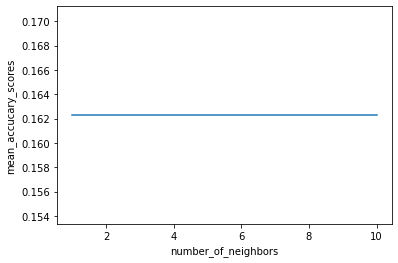

In [51]:
find_optimal_neighbors(metrics='euclidean')

num neighbors no is 1
num neighbors no is 2
num neighbors no is 3
num neighbors no is 4
num neighbors no is 5
num neighbors no is 6
num neighbors no is 7
num neighbors no is 8
num neighbors no is 9
num neighbors no is 10


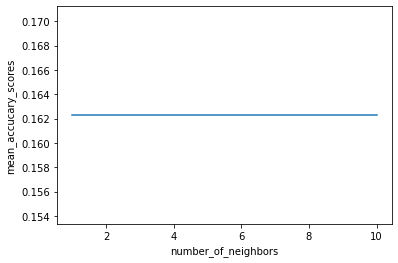

In [52]:
find_optimal_neighbors(metrics='cosine')

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [ ]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

KNN сколонен к проклятию размерности, поэтому он не очень хорошо работает на многомерных массивах, к которым в том чиле
относятся тексты 